<a href="https://colab.research.google.com/github/abayro125/MAT494/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.2 Probability Distribution**

2.2.1 Probability Axioms

2.2.1.1 Sample Spaces and Events

Definition 2.2.1 The sample space of an experiment, denoted by S, is the set
of all possible outcomes of that experiment


In [ ]:
S = ['hh', 'th', 'tt', 'hh'] #The sample space of flipping a coin twice

Definition 2.2.2 An event is any collection (subset) of outcomes contained in the sample space S. An event is simple if it consists of exactly one outcome
and compound if it consists of more than one outcome

In [ ]:
print("An event in the sample space of flipping a coin twice:")
print("EX: landing on heads twice") 

subset = ['hh'] #subset 

An event in the sample space of flipping a coin twice:
EX: landing on heads twice


Definition 2.2.3 Given an experiment and a sample space S, the probability
distribution is a function which assign to each event A a number P(A), called
the probability of the event A, which will give a precise measure of the chance
that A will occur. The probability assignments should satisfy the following
axioms (basic properties) of probability.

In [ ]:
p_head = 1/2 #probably of landing on head
p_tail = 1/2 #probability of landing on tail

p_hh = p_head * p_head #probabilty of two heads
p_total = p_head + p_tail #probability of either heads or tails

print("The probability of landing on heads twice is:", p_hh)
print("The probability of landing on either heads or tails is:", p_total)

The probability of landing on heads twice is: 0.25
The probability of landing on either heads or tails is: 1.0


2.2.2 Conditional Probability

Conditional probability is defined as the likelihood of an event or outcome
occurring, based on the occurrence of a previous event or outcome. The conditional
probability is expressed as a ratio of unconditional probabilities: The
numerator is the probability of the intersection of the two events, whereas the
denominator is the probability of the conditioning event B. Given that B has
occurred, the relevant sample space is no longer S but consists of outcomes
in B; A has occurred if and only if one of the outcomes in the intersection occurred,
so the conditional probability of A given B is proportional to P(A∩B).

Definition 2.2.5 For any two events A and B with P(B) > 0, the conditional
probability of A given that B has occurred is defined by

P(A | B) = P(A∩B)/P(B)


In [ ]:
import pandas as pd
import numpy as np

#create pandas DataFrame with raw data
df = pd.DataFrame({'gender': np.repeat(np.array(['Male', 'Female']), 150),
                   'sport': np.repeat(np.array(['Baseball', 'Basketball', 'Football',
                                                'Soccer', 'Baseball', 'Basketball',
                                                'Football', 'Soccer']), 
                                    (34, 40, 58, 18, 34, 52, 20, 44))})

#produce contingency table to summarize raw data
survey_data = pd.crosstab(index=df['gender'], columns=df['sport'], margins=True)

#view contingency table
print(survey_data)

#extract value in second row and first column 
survey_data.iloc[1, 0]

#calculate probability of being male, given that individual prefers baseball
prob1 = survey_data.iloc[1, 0] / survey_data.iloc[2,0]
print("The probability of being male, given that individual prefers baseball is:", prob1)
                                          
#calculate probability of preferring basketball, given that individual is female
prob2 = survey_data.iloc[0, 1] / survey_data.iloc[0, 4]
print("The probability of preferring basketball, given that individual is female is:", prob2)


sport   Baseball  Basketball  Football  Soccer  All
gender                                             
Female        34          52        20      44  150
Male          34          40        58      18  150
All           68          92        78      62  300
The probability of being male, given that individual prefers baseball is: 0.5
The probability of preferring basketball, given that individual is female is: 0.3466666666666667


Definition 2.2.6 Two events A and B are independent if P(A | B) = P(A) ( or
P(A∩B) = P(A) ·P(B)), and are dependent otherwise.

Definition 2.2.7 Events A1, . . . ,An are mutually independent if for every k(k =
2,3, . . . ,n) and every subset of indices i1, i2, . . . , ik,
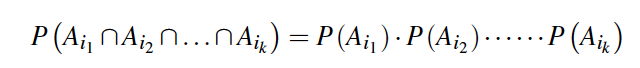
 

2.2.3 Discrete Random Variables

A random variable is understood as a measurable function defined on a probability
space that maps from the sample space to the real numbers. It is
often convenient to associate each outcome of an experiment with a number.
A random variable is described informally as a variable whose values depend
on outcomes of a random phenomenon as shown below 
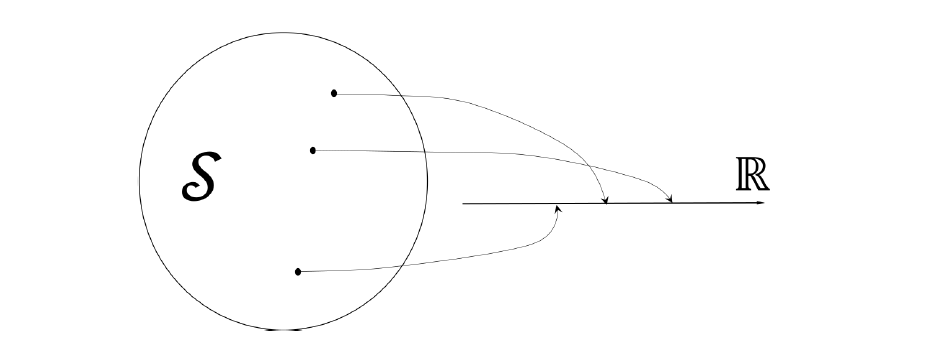



Definition 2.2.8 For a given sample space S of some experiment, a random
variable is any rule that associates a number with each outcome in S. Mathematically,
a random variable is a function whose domain is the sample space
and whose range is the set of real numbers.


In [ ]:
#The event is the number of heads during two coin tosses

Y = [0, 1, 2]
print("The sample space of the number of heads during two coin tosses can be represented")
print("as the random variable Y with values",Y)

The sample space of the number of heads during two coin tosses can be represented
as the random variable Y with values [0, 1, 2]


Definition 2.2.9 A discrete random variable is a random variable whose possible
values either constitute a finite set or else can be listed in an infinite
sequence. A random variable is continuous if both of the following apply:
1. Its set of possible values consists all numbers in a single interval on the
number line.
2. P(X = c) = 0 for any possible value individual c.

Definition 2.2.10 The probability distribution or probability mass function
(pmf) of a discrete random variable is defined for every number x by
p(x) = P(X = x) = P(all s ∈ S : X(s) = x)

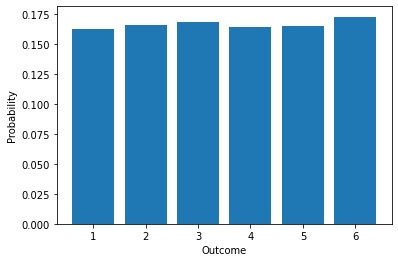

In [ ]:
import matplotlib.pyplot as plt

num_throws = 10000
outcomes = np.zeros(num_throws)
for i in range(num_throws):
    # let's roll the die
    outcome = np.random.choice(['1', '2', '3', '4', '5', '6'])
    outcomes[i] = outcome


val, cnt = np.unique(outcomes, return_counts=True)
prop = cnt / len(outcomes)

# Now that we have rolled our die 10000 times, let's plot the results
plt.bar(val, prop)
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()
plt.close()

Definition 2.2.11 The cumulative distribution function (cdf) F(x) of a discrete
random variable variable X with pmfp(x) is defined for every number x
by
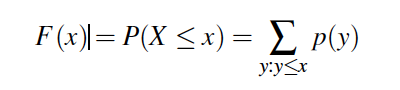

Text(0.5, 0, 'x')

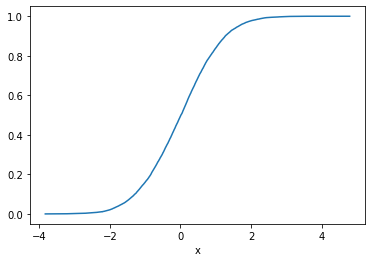

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define random sample of data
data = np.random.randn(10000)

#sort data
x = np.sort(data)

#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

#plot CDF
plt.plot(x, y)
plt.xlabel('x')

2.2.3.1 The Expected Value and Variance of X
The expected value of a random variable X is a generalization of the weighted
average, and is intuitively the arithmetic mean of a large number of independent
realizations of X.
Definition 2.2.14 Let X be a discrete random variable with set of possible
values D and pmf p(x). The expected value or mean value of X, denoted by
E(X) or μX or just μ, is

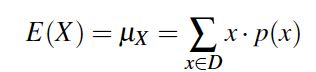

In [ ]:

import numpy as np

def expected_value(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return (values * weights).sum() / weights.sum()

#define values
values = [0, 1, 2, 3, 4]

#define probabilities
probs  = [.18, .34, .35, .11, .02]

#calculate expected value
expected_value(values, probs)

print("The expected value is",expected_value(values, probs))

1.450000

The expected value is 1.4500000000000002


1.45

2.2.4 Continuous Random Variables

A random variable X is continuous if possible values comprise either a single
interval on the number line or a union of disjoint intervals.
Definition 2.2.19 Let X be a continuous random variable. Then a probability
distribution or probability density function (pdf) of X is a function f (x) such
that for any two numbers a and b with a ≤ b,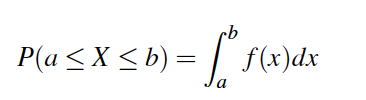

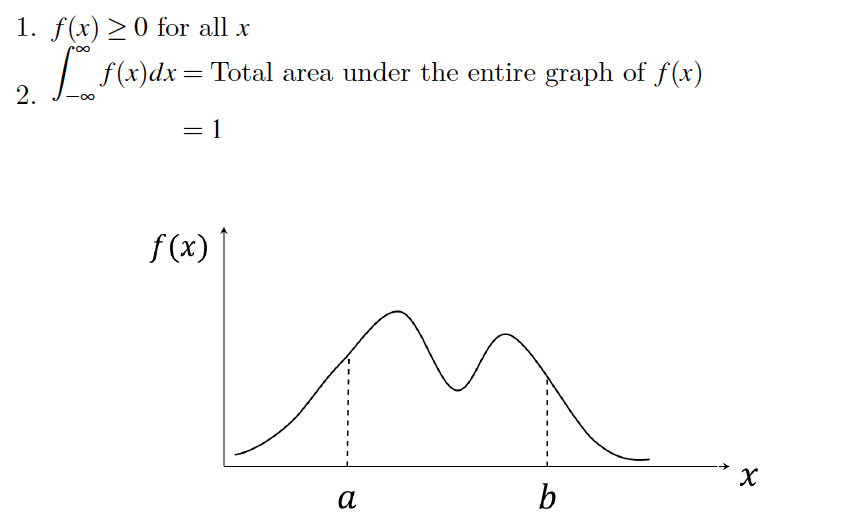

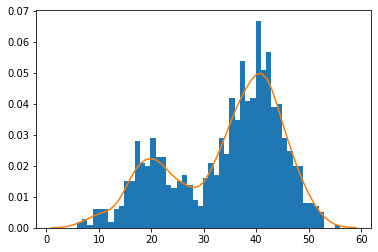

In [ ]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()

2.2.4.1 Expected Values and Variances
We define the expected values and variances for continuous random variables
as for discrete variables.
Definition 2.2.20 The expected or mean value of a continuous random variable
X with pdf f (x) is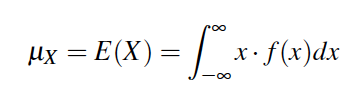

Definition 2.2.21 The variance of a continuous random variable X with pdf
f (x) and the variance is μ is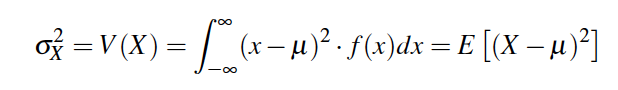

Definition 2.2.23 X is said to have an exponential distribution with parameter
λ (λ > 0) if the pdf of X is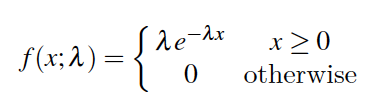

2.2.4.2 The Normal Distribution
Normal distributions are often used in the natural and social sciences to
represent real-valued random variables whose distributions are not known.
Definition 2.2.24 A continuous random variable X is said to have a normal
distribution with parameters μ and σ (or μ and σ 2 ), where −∞ < μ < ∞
and 0 <σ , if the pdf of X is
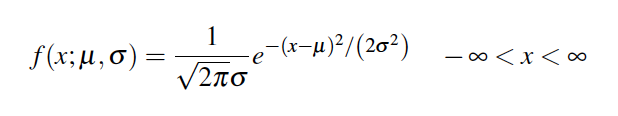

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

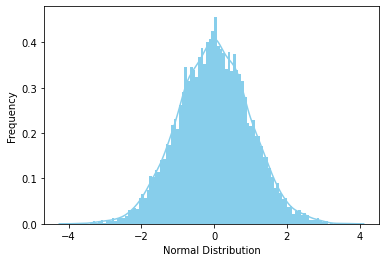

In [3]:
from scipy.stats import norm
import seaborn as sns

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')



Definition 2.2.25 The normal distribution with parameter values μ = 0 and
σ = 1 is called the standard normal distribution. A random variable having
a standard normal distribution is called a standard normal random variable
and will be denoted by Z. The pdf of Z is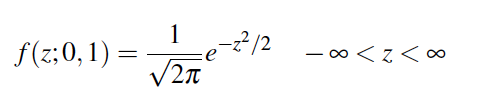